In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

2023-07-18 02:49:31.476889: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
df = pd.read_csv( 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
fraud = (df['Class'] == 1).sum()
normal = (df['Class'] == 0).sum()
total = fraud + normal
total, f'{fraud / total * 100:.2f}%', f'{normal / total * 100:.2f}%'

(284807, '0.17%', '99.83%')

In [6]:
df['Time'] = df['Time'].apply(lambda t: t / 3600 % 24)
df['Amount'] = np.log(df['Amount'] + 1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,23.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.570980,0
284803,23.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.249987,0
284804,23.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.232366,0
284805,23.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.397895,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1), 
    df['Class'],
    test_size=0.5,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142403, 30), (142404, 30), (142403,), (142404,))

In [8]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
y_train.value_counts() / y_train.count()

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

In [10]:
y_test.value_counts() / y_test.count()

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

In [11]:
X_train_normal = X_train[y_train == 0]
X_train_fraud = X_train[y_train == 1]
X_train_normal.shape, X_train_fraud.shape

((142157, 30), (246, 30))

In [12]:
X_test_normal = X_test[y_test == 0]
X_test_fraud = X_test[y_test == 1]
X_test_normal.shape, X_test_fraud.shape

((142158, 30), (246, 30))

In [38]:
input_layer = Input(shape=(30, ))
encoded_normal = Dense(12, activation='relu')(input_layer)
decoded_normal = Dense(30, activation='linear')(encoded_normal)
autoencoder_normal = Model(input_layer, decoded_normal)

In [39]:
autoencoder_normal.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_4 (Dense)             (None, 12)                372       
                                                                 
 dense_5 (Dense)             (None, 30)                390       
                                                                 
Total params: 762 (2.98 KB)
Trainable params: 762 (2.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
autoencoder_normal.compile(optimizer='adam', loss='mse')

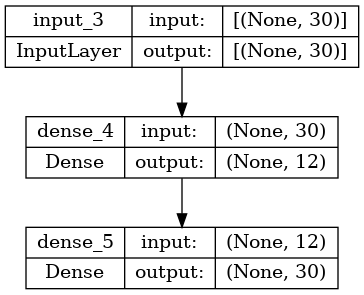

In [41]:
plot_model(autoencoder_normal, show_shapes=True)

In [42]:
history = autoencoder_normal.fit(
    X_train_normal, 
    X_train_normal, 
    epochs=30, 
    batch_size=128, 
    validation_data=(X_test_normal, X_test_normal)
)

Epoch 1/30
1111/1111 [==============================] - 8s 6ms/step - loss: 0.7513 - val_loss: 0.5773
Epoch 2/30
1111/1111 [==============================] - 7s 6ms/step - loss: 0.5645 - val_loss: 0.5271
Epoch 3/30
1111/1111 [==============================] - 7s 6ms/step - loss: 0.5383 - val_loss: 0.5188
Epoch 4/30
1111/1111 [==============================] - 7s 6ms/step - loss: 0.5334 - val_loss: 0.5163
Epoch 5/30
1111/1111 [==============================] - 7s 6ms/step - loss: 0.5317 - val_loss: 0.5163
Epoch 6/30
1111/1111 [==============================] - 7s 6ms/step - loss: 0.5307 - val_loss: 0.5163
Epoch 7/30
1111/1111 [==============================] - 7s 6ms/step - loss: 0.5297 - val_loss: 0.5161
Epoch 8/30
1111/1111 [==============================] - 7s 6ms/step - loss: 0.5294 - val_loss: 0.5164
Epoch 9/30
1111/1111 [==============================] - 7s 6ms/step - loss: 0.5286 - val_loss: 0.5167
Epoch 10/30
1111/1111 [==============================] - 7s 6ms/step - loss: 0.528

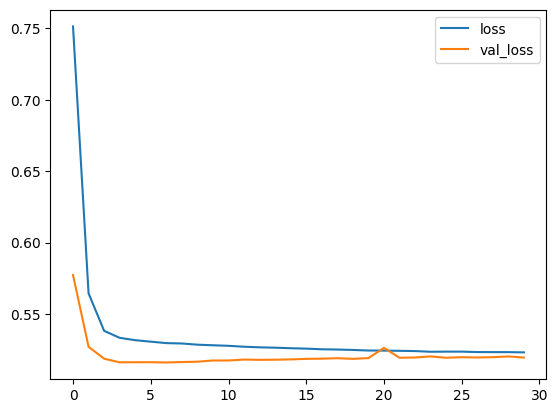

In [43]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [44]:
indices = np.random.choice(len(X_train_normal), 250, replace=False) 
Nom_data = X_train_normal[indices]
Nom_data.shape

(250, 30)

In [45]:
Nom_pred = autoencoder_normal.predict(Nom_data, verbose=0)
Nom_pred.shape

(250, 30)

In [46]:
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1)
Nom_pred_mse.shape

(250,)

In [47]:
Nom_pred_mse_df = pd.DataFrame({'Normal_mse': Nom_pred_mse})
Nom_pred_mse_df

,Normal_mse
0,0.609139
1,0.235692
2,0.139128
3,0.319863
4,0.243604
...,...
245,0.252640
246,0.693854
247,0.149910
248,0.232768


In [48]:
Nom_pred_mse_df.describe()

,Normal_mse
count,250.000000
mean,0.544441
std,1.855698
min,0.062849
25%,0.200028
50%,0.290629
75%,0.434309
max,24.295267


In [49]:
Anom_pred = autoencoder_normal.predict(X_train_fraud)
Anom_pred.shape

8/8 [==============================] - 0s 2ms/step


(246, 30)

In [50]:
Anom_pred_mse = np.mean(np.power(X_train_fraud - Anom_pred, 2), axis=1)
Anom_pred_mse.shape

(246,)

In [51]:
Anom_pred_mse_df = pd.DataFrame({'Anomaly_mse': Anom_pred_mse})
Anom_pred_mse_df.describe()

,Anomaly_mse
count,246.000000
mean,18.867281
std,25.418886
min,0.115940
25%,4.075658
50%,8.688756
75%,20.863679
max,199.910160


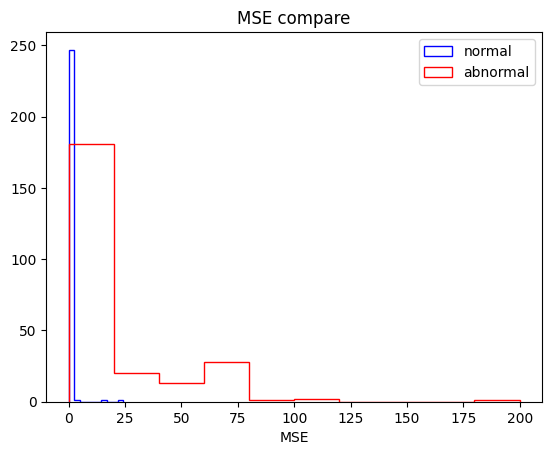

In [52]:
plt.title('MSE compare')
plt.hist(Nom_pred_mse, bins=10, color='blue', histtype='step', label='normal')
plt.hist(Anom_pred_mse, bins=10, color='red', histtype='step', label='abnormal')
plt.xlabel('MSE')
plt.legend()

Text(0, 0.5, 'MSE')

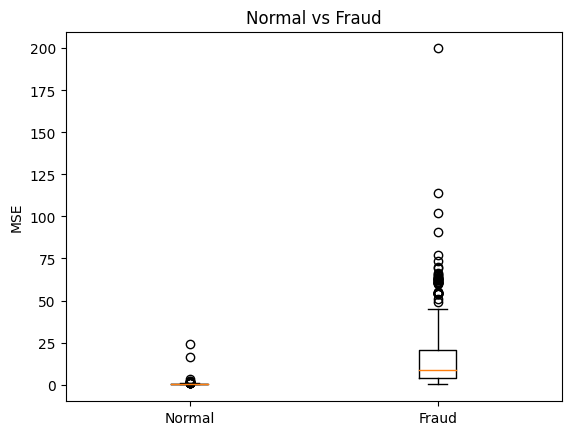

In [53]:
plt.boxplot([Nom_pred_mse, Anom_pred_mse])
plt.title('Normal vs Fraud')
plt.xticks(ticks=[1, 2], labels=['Normal', 'Fraud'])
plt.ylabel('MSE')

In [54]:
predictions = autoencoder_normal.predict(X_train)
mse = np.mean(np.power(X_train - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_train})
error_df

4451/4451 [==============================] - 8s 2ms/step


,reconstruction_error,true_class
102120,0.738401,0
147630,0.401207,0
243316,0.169035,0
259221,0.312484,0
144969,0.323122,0
...,...,...
119879,0.112929,0
259178,0.745060,0
131932,0.098192,0
146867,0.913455,0


In [55]:
desc = error_df.groupby('true_class').describe()
desc

reconstruction_error                                            \
                          count       mean        std       min       25%   
true_class                                                                  
0                      142157.0   0.521977   1.871881  0.027527  0.202873   
1                         246.0  18.867281  25.418886  0.115940  4.075658   

                                             
                 50%        75%         max  
true_class                                   
0           0.305336   0.475238  259.369979  
1           8.688756  20.863679  199.910160

In [56]:
mean = desc['reconstruction_error']['mean'][0]
std = desc['reconstruction_error']['std'][0]
thresholds = {'3sigma': mean + 3 * std, '2.5sigma': mean + 2.5 * std, '2sigma': mean + 2 * std}
mean, std, thresholds

(0.5219769170172887,
 1.8718807707748224,
 {'3sigma': 6.137619229341755,
  '2.5sigma': 5.201678843954344,
  '2sigma': 4.265738458566934})

In [57]:
[1 if er >= thresholds['3sigma'] else 0 for er in [0, 5, 10, 50, 150]]

[0, 0, 1, 1, 1]

In [58]:
ths = sorted(thresholds.items(), key=lambda i: i[1])
ths

[('2sigma', 4.265738458566934),
 ('2.5sigma', 5.201678843954344),
 ('3sigma', 6.137619229341755)]

4451/4451 [==============================] - 8s 2ms/step
Precision 0.11
Recall 0.69


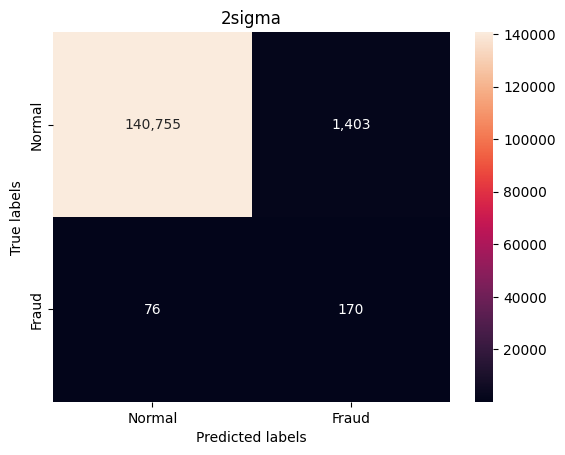

4451/4451 [==============================] - 8s 2ms/step
Precision 0.12
Recall 0.63


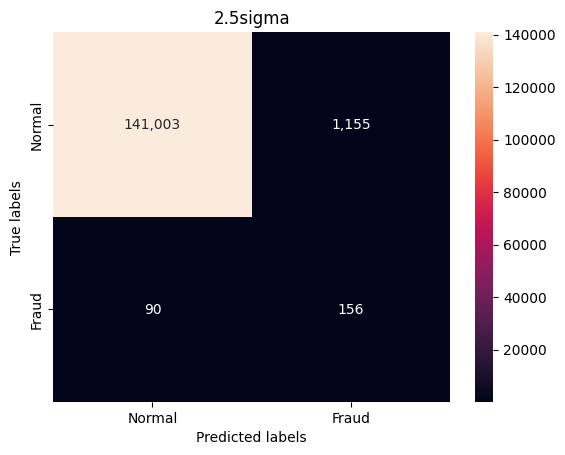

4451/4451 [==============================] - 8s 2ms/step
Precision 0.14
Recall 0.61


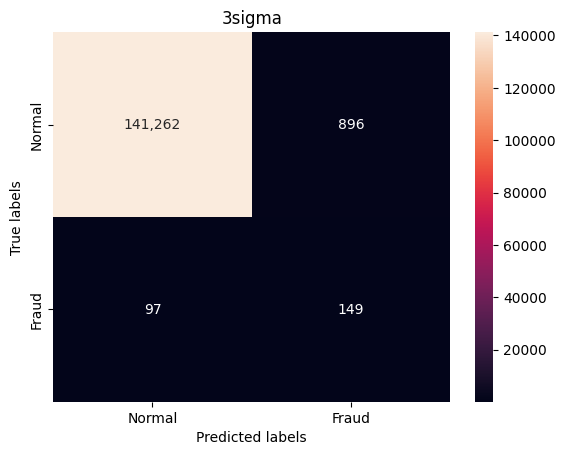

In [60]:
for k, th in ths:
    test_predictions = autoencoder_normal.predict(X_test)
    mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
    y_pred = [1 if er > th else 0 for er in mse]

    print(f'Precision {precision_score(y_test, y_pred):.2f}')
    print(f'Recall {recall_score(y_test, y_pred):.2f}')

    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, fmt=',')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['Normal', 'Fraud'])
    ax.yaxis.set_ticklabels(['Normal', 'Fraud'])
    ax.set(yticks=[0.5, 1.5], xticks=[0.5, 1.5])
    ax.set_title(k)
    plt.show()